In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit


In [54]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [55]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [56]:
class DecayingSineModel2021(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine2021(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel2021, self).__init__(decaying_sine2021, *args, **kwargs)

    def guess(self, data, **kwargs):
        #params = self.make_params(b= 1.22, d= 3.33)
        params = Parameters()
        params.add('b', value=1.1)
        params.add('d', value = 3.3, min= 80, max= 200)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [64]:

def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2)
    if year == '30to44anyopioid2021.csv' or year == '30to44anyopioid2020.csv':  
        model = DecayingSineModel2021()
        params = model.guess(df2['ccount'], x=df2['rate'])
        fit = model.fit(df2['ccount'], params, x=df2['rate'] )
    else:
        model = DecayingSineModel()
        params = model.guess(df2['ccount'], x=df2['rate'])
        fit = model.fit(df2['ccount'], params, x=df2['rate'] )
    return fit, df2


In [65]:
df2021 = pd.read_csv('30to44anyopioid2021.csv')
df2021

,county,rate,num1,num2,num3
0,Inyo,140.0550,38.1600,746.0875,70.0275
1,Humboldt,128.8825,59.2950,244.3500,42.7775
2,Mendocino,122.6750,63.3900,251.9950,35.4150
3,El Dorado,104.2100,56.9800,185.7600,28.0450
4,Plumas,100.2000,27.3000,533.7750,50.1000
5,Shasta,98.9175,50.0300,176.4200,29.5000
6,Nevada,87.2800,30.7300,217.8450,37.2500
7,San Benito,76.2000,28.8525,211.9825,30.6600
8,Sonoma,69.3000,42.8375,106.5575,15.2400
9,Butte,59.0875,30.3500,112.4075,17.4750


In [66]:
f,df2= getModel('30to44anyopioid2021.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.200000
2    2.0  0.200000
3    3.0  0.200000
4    4.0  0.200000
..   ...       ...
95  95.0  0.883333
96  96.0  0.883333
97  97.0  0.883333
98  98.0  0.883333
99  99.0  0.900000

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWa

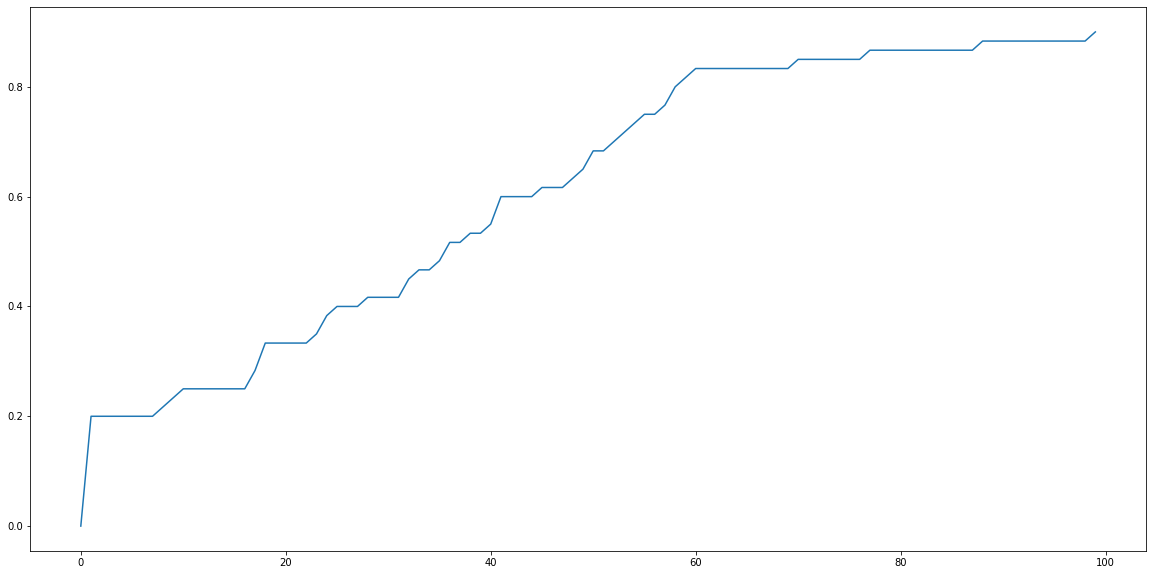

In [67]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [68]:
f.params["b"].value,f.params["d"].value

(1.5406154723069594, 192.44606976421545)

In [69]:
f,df2= getModel('30to44anyopioid2020.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.300000
2    2.0  0.300000
3    3.0  0.300000
4    4.0  0.300000
..   ...       ...
95  95.0  0.966667
96  96.0  0.966667
97  97.0  0.966667
98  98.0  0.966667
99  99.0  0.966667

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWa

In [70]:
f.params["b"].value,f.params["d"].value

(1.4908624403028903, 85.08387585331108)

In [71]:
df2

,rate,ccount
0,0.0,0.000000
1,1.0,0.300000
2,2.0,0.300000
3,3.0,0.300000
4,4.0,0.300000
...,...,...
95,95.0,0.966667
96,96.0,0.966667
97,97.0,0.966667
98,98.0,0.966667


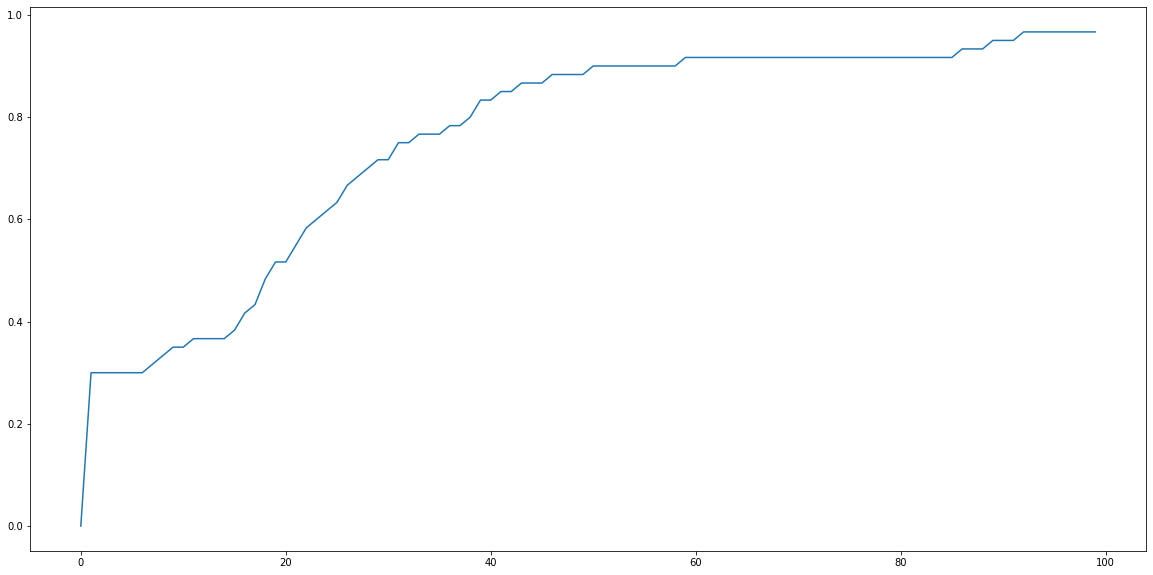

In [72]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [73]:
files = ['30to44anyopioid2021.csv', '30to44anyopioid2020.csv','30to44anyopioid2019.csv','30to44anyopioid2018.csv','30to44anyopioid2017.csv', '30to44anyopioid2016.csv']
bval = []
dval = []
year = []
for file in files:
    f,df2 = getModel(file)
    year.append(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

    rate    ccount
0    0.0  0.000000
1    1.0  0.200000
2    2.0  0.200000
3    3.0  0.200000
4    4.0  0.200000
..   ...       ...
95  95.0  0.883333
96  96.0  0.883333
97  97.0  0.883333
98  98.0  0.883333
99  99.0  0.900000

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.300000
2    2.0  0.300000
3    3.0  0.300000
4    4.0  0.300000
..   ...       ...
95  95.0  0.966667
96  96.0  0.966667
97  97.0  0.966667
98  98.0  0.966667
99  99.0  0.966667

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.366667
2    2.0  0.366667
3    3.0  0.366667
4    4.0  0.383333
..   ...       ...
95  95.0  0.966667
96  96.0  0.966667
97  97.0  0.966667
98  98.0  0.966667
99  99.0  0.966667

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.383333
2    2.0  0.383333
3    3.0  0.383333
4    4.0  0.400000
..   ...       ...
95  95.0  0.983333
96  96.0  0.983333
97  97.0  0.983333
98  98.0  0.983333
99  99.0  0.983333

[100 rows x 2 c

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_32089/62694870.py:9: FutureWa

In [74]:
bval

[1.5406154723069594,
 1.4908624403028903,
 1.3562996856066687,
 1.3204729297450597,
 1.0345898191000014,
 1.0070736707783325]

In [75]:
year

['30to44anyopioid2021.csv',
 '30to44anyopioid2020.csv',
 '30to44anyopioid2019.csv',
 '30to44anyopioid2018.csv',
 '30to44anyopioid2017.csv',
 '30to44anyopioid2016.csv']

In [76]:
dval

[192.44606976421545,
 85.08387585331108,
 15.728367543230497,
 8.671424126431495,
 3.470858849535054,
 2.9933722418135593]

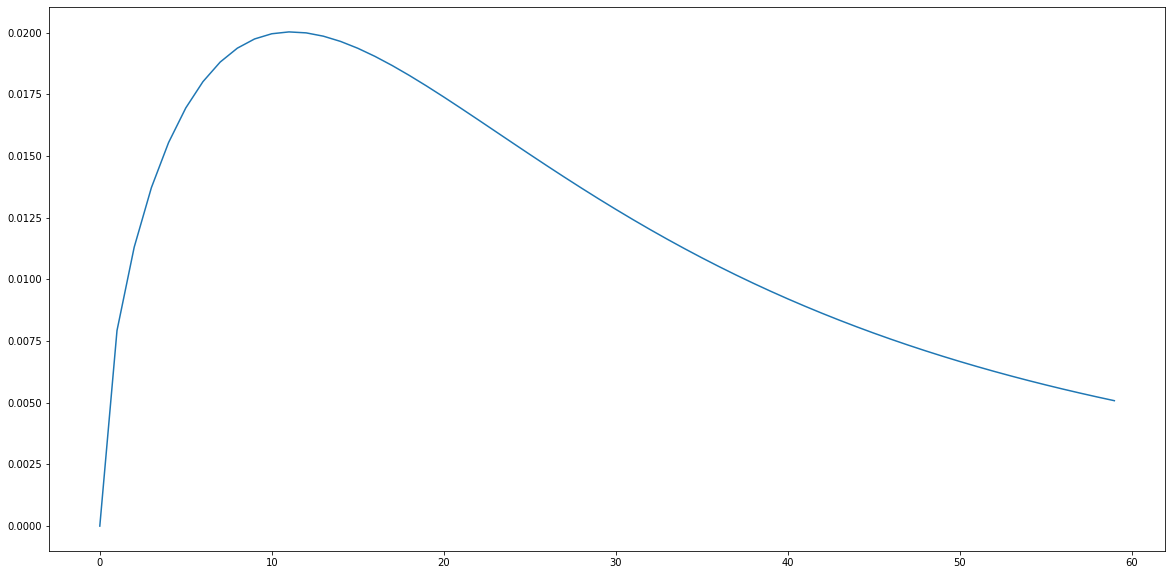

In [77]:
year_no=0
density_x=[]
rate_y=[]
for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2)) #derivativeofb&dequation
    rate_y.append(y_rate)

plt.plot(density_x,rate_y)

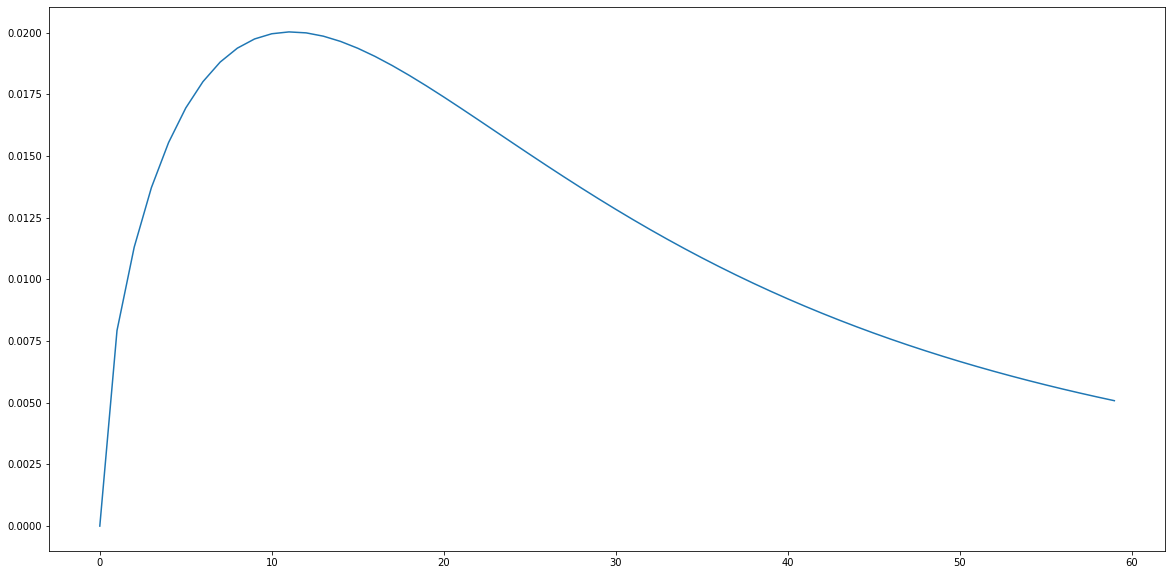

In [78]:
year_no=0
density_x=[]
rate_y=[]

for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

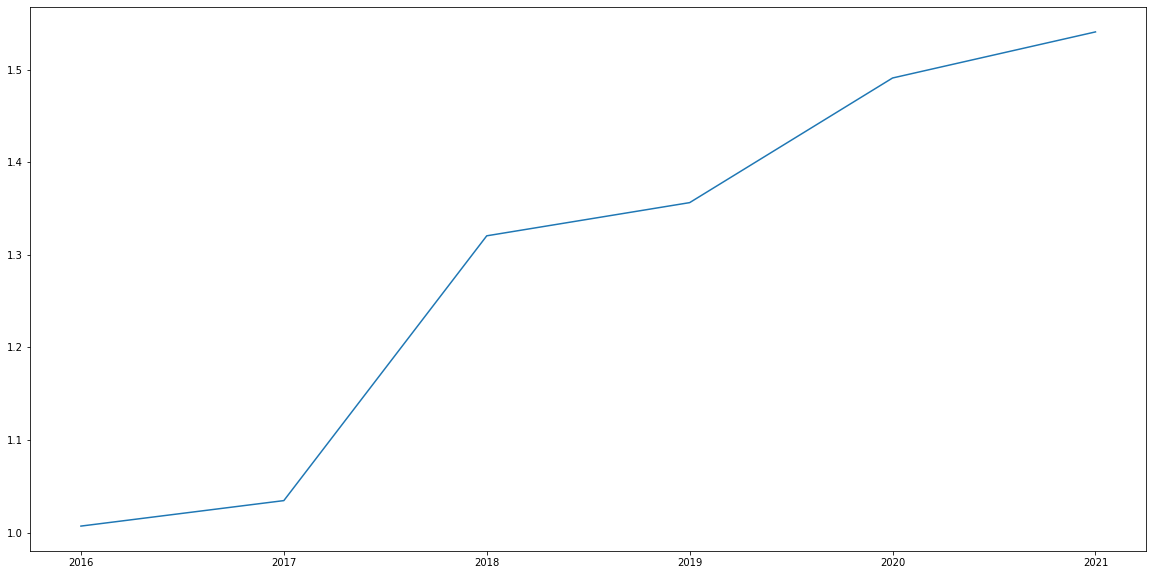

In [79]:
x = [2021,2020,2019,2018,2017,2016]
y = bval
plt.plot(x,y )

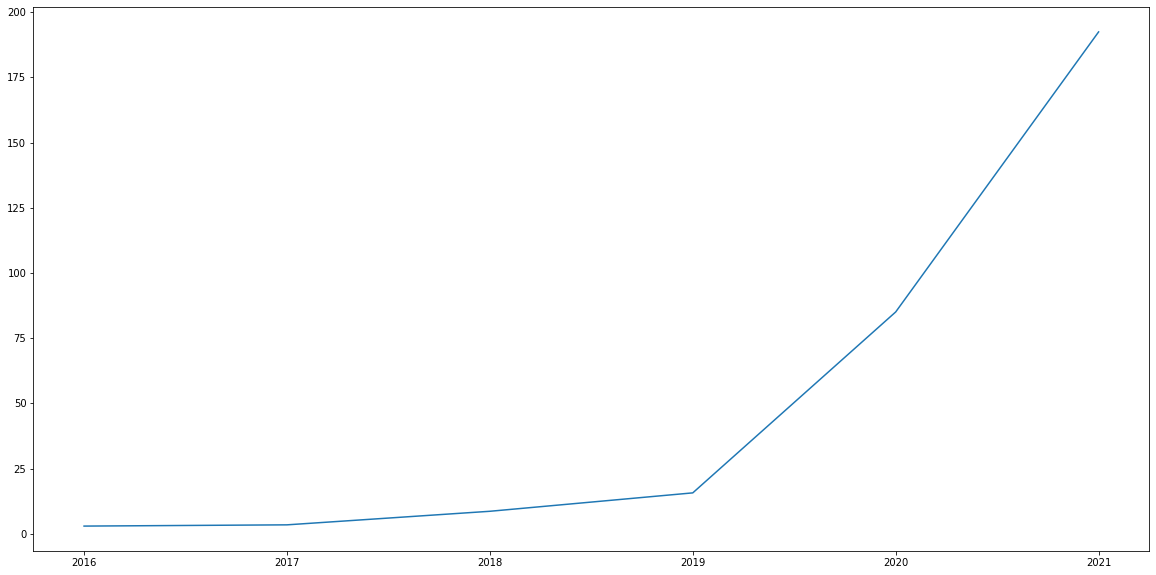

In [80]:
x = [2021,2020,2019,2018,2017,2016]
y = dval
plt.plot(x,y )

In [81]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

In [82]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2
3
4


Text(0.5, 1.0, 'Density Curve: 30-34 Any Opioid Overdose Death Rates')

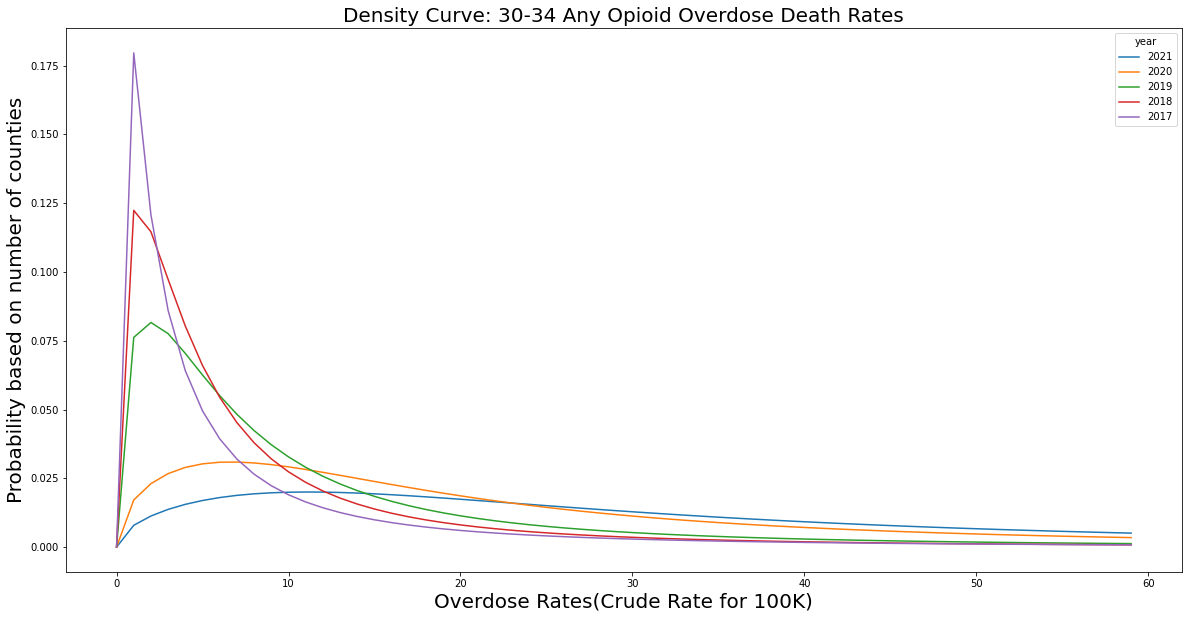

In [83]:
bval_1 = bval[0:5]
bval_1 = dval[0:5]
year2= [2021,2020,2019,2018,2017]
for m in range(len(bval_1)):
    print(m)
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(60):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(year2[m]))
plt.legend(title='year')
plt.xlabel("Overdose Rates(Crude Rate for 100K)", fontsize = 20)
plt.ylabel("Probability based on number of counties", fontsize = 20)
plt.title("Density Curve: 30-34 Any Opioid Overdose Death Rates", fontsize = 20)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_89527/1062718043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (d*b*pow(x,b-1))/(pow((q+d),2))


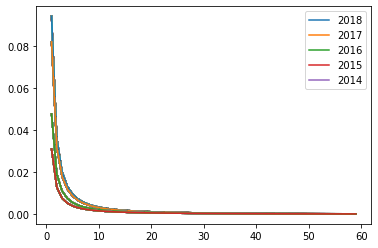

In [50]:
bval_2 = bval[4:]
dval_2 = dval[4:]
for m in range(len(bval_2)):
    x = []
    y= []
    b = bval_2[m]
    d = dval_2[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
        plt.plot(x,y,label= str(year2[m]))
    plt.plot(x,y)
plt.legend(["2018", "2017", "2016", "2015", "2014"])

In [ ]:
3#